# Workshop 4b - Dudley Hierarchical clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import os, re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from IPython.display import IFrame
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
 
%matplotlib inline
 
import warnings
warnings.filterwarnings('ignore')

For this notebook, I am considering a period of December 2021 to December 2022

In [2]:
path_to_data = './crime'
cd = os.path.dirname(os.path.abspath(path_to_data))
 
i = 0
columns = range(1,100)
dfList = []
 
for root, dirs, files in os.walk(cd):
    for fname in files:
        if re.match("^.*.csv$", fname):
            frame = pd.read_csv(os.path.join(root, fname))
            frame['key'] = "file{}".format(i)
            dfList.append(frame)    
            i += 1
 
dataset = pd.concat(dfList)

In [3]:
dataset.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key
0,NaN,2021-12,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,Anti-social behaviour,NaN,NaN,file0
1,01988dde64ab85a563fdbf7b7d48bb1c64163446defb36...,2021-12,West Midlands Police,West Midlands Police,-1.851382,52.591757,On or near Walsall Road,E01009417,Birmingham 001A,Robbery,Investigation complete; no suspect identified,NaN,file0
2,80a7628f3737fe0f5fe1d3835f44730498309bb28565f2...,2021-12,West Midlands Police,West Midlands Police,-1.851382,52.591757,On or near Walsall Road,E01009417,Birmingham 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,file0
3,5d2ea684f34a8c6ffd574c8a61b326447a3c9384174084...,2021-12,West Midlands Police,West Midlands Police,-1.849280,52.593346,On or near Russell Bank Road,E01009417,Birmingham 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,file0
4,552eac09561aa50f4c68db0a4c0d11512c80066ea2f55a...,2021-12,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,Burglary,Investigation complete; no suspect identified,NaN,file0


In [4]:
print(dataset.shape)

(3765438, 13)


In [5]:
name_number = 'AkinyemiArabambi-2302546.csv'

In [6]:
data = pd.read_csv(name_number)

In [7]:
data['Crime type'].value_counts()

Violence and sexual offences    1073298
Vehicle crime                    244020
Public order                     217134
Criminal damage and arson        192186
Other theft                      167760
Burglary                         138522
Anti-social behaviour            135048
Shoplifting                      105486
Robbery                           53544
Drugs                             51480
Possession of weapons             45744
Other crime                       41364
Theft from the person             29004
Bicycle theft                     15702
Name: Crime type, dtype: int64

# Q1. Use a similar approach to display number of crimes in each month. You can use the "Month" column to do that.

In [8]:
data['Month'].value_counts()

2022-07    207492
2022-05    204630
2022-08    202050
2022-06    200004
2022-10    197748
2022-03    195582
2021-12    193224
2022-04    191058
2022-09    190182
2022-01    187698
2022-11    185784
2022-02    178782
2022-12    176058
Name: Month, dtype: int64

In [9]:
data['town'] = data['LSOA name'].str.split(' ').str[0]

In [10]:
data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town
0,NaN,2021-12,West Midlands Police,West Midlands Police,-1.850772,52.588691,On or near Seymour Gardens,E01009417,Birmingham 001A,Anti-social behaviour,NaN,NaN,file0,Birmingham
1,01988dde64ab85a563fdbf7b7d48bb1c64163446defb36...,2021-12,West Midlands Police,West Midlands Police,-1.851382,52.591757,On or near Walsall Road,E01009417,Birmingham 001A,Robbery,Investigation complete; no suspect identified,NaN,file0,Birmingham
2,80a7628f3737fe0f5fe1d3835f44730498309bb28565f2...,2021-12,West Midlands Police,West Midlands Police,-1.851382,52.591757,On or near Walsall Road,E01009417,Birmingham 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,file0,Birmingham
3,5d2ea684f34a8c6ffd574c8a61b326447a3c9384174084...,2021-12,West Midlands Police,West Midlands Police,-1.849280,52.593346,On or near Russell Bank Road,E01009417,Birmingham 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,file0,Birmingham
4,552eac09561aa50f4c68db0a4c0d11512c80066ea2f55a...,2021-12,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,Burglary,Investigation complete; no suspect identified,NaN,file0,Birmingham


In [11]:
towns = ['Dudley']
filtered_data = data[data.town.str.contains('|'.join(towns), na=False)]
filtered_data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town
17770,4343dfc303951b62cddb34d316f7396ce2fa078906cfa2...,2021-12,West Midlands Police,West Midlands Police,-2.083943,52.549631,On or near Bell Street,E01009763,Dudley 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,file0,Dudley
17771,84b43f3b32d33a4003a8484ca98b141744da5bca25f9d3...,2021-12,West Midlands Police,West Midlands Police,-2.077263,52.550139,On or near Skidmore Road,E01009763,Dudley 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,file0,Dudley
17772,5034aa50a37e7431c7047ae66ff7eba95c30b5a0fad919...,2021-12,West Midlands Police,West Midlands Police,-2.087360,52.547390,On or near Havacre Lane,E01009763,Dudley 001A,Other theft,Investigation complete; no suspect identified,NaN,file0,Dudley
17773,cc984934af7be5524dbd1c78f67fdd2fdba189cceb1bf7...,2021-12,West Midlands Police,West Midlands Police,-2.075000,52.545942,On or near Sunbury Close,E01009763,Dudley 001A,Other theft,Investigation complete; no suspect identified,NaN,file0,Dudley
17774,c084477f818e8e32dffc951f7160649a122dc9de788e04...,2021-12,West Midlands Police,West Midlands Police,-2.083943,52.549631,On or near Bell Street,E01009763,Dudley 001A,Other theft,Investigation complete; no suspect identified,NaN,file0,Dudley


# Q2. Display crime types in Dudley.

In [12]:
print('The crime types in Dudley are: ', filtered_data['Crime type'].unique())

The crime types in Dudley are:  ['Criminal damage and arson' 'Other theft' 'Public order' 'Vehicle crime'
 'Violence and sexual offences' 'Anti-social behaviour' 'Burglary'
 'Other crime' 'Possession of weapons' 'Robbery' 'Theft from the person'
 'Shoplifting' 'Drugs' 'Bicycle theft']


# Q3. What is the most common crime committed in Dudley in the dataset? Is it the same most common crime in West Midlands too?

In [13]:
filtered_data['Crime type'].value_counts()

Violence and sexual offences    92772
Vehicle crime                   20178
Public order                    19320
Criminal damage and arson       18558
Anti-social behaviour           11934
Burglary                        11616
Other theft                     11244
Shoplifting                      9762
Other crime                      4044
Robbery                          3624
Possession of weapons            3444
Drugs                            3078
Theft from the person            1224
Bicycle theft                     360
Name: Crime type, dtype: int64

In [14]:
data['Crime type'].value_counts()

Violence and sexual offences    1073298
Vehicle crime                    244020
Public order                     217134
Criminal damage and arson        192186
Other theft                      167760
Burglary                         138522
Anti-social behaviour            135048
Shoplifting                      105486
Robbery                           53544
Drugs                             51480
Possession of weapons             45744
Other crime                       41364
Theft from the person             29004
Bicycle theft                     15702
Name: Crime type, dtype: int64

#### Q. Sort the column 'LSOA code' by number of crimes and display the top 10 'LOSA code'.

In [15]:
filtered_data['LSOA code'].value_counts().nlargest(10)

E01009741    8472
E01009892    6378
E01009757    5850
E01009881    5082
E01009889    4908
E01009744    4134
E01009856    3918
E01009746    3762
E01009836    3750
E01033187    3534
Name: LSOA code, dtype: int64

# Q4. Provide a prime landmark of minimum of 2 LSOA codes under investigation. If there is no recognisable prime landmark, provide name(s) of the nearby streets/roads surrounding those areas.

LSOA code E01009741 which is the Merry Hill Shopping Center which includes the area around the Mill Street as well has the highest crime rate of 1412 crimes in Dudley (https://www.doogal.co.uk/LSOA?code=E01009741)

LSOA code E01009892 is the area Dudley Southern bypass which includes Trindle road and St Johns road has the second highest crime rate of 1350 in the Dudley region (https://www.doogal.co.uk/LSOA?code=E01009892)

In [16]:
filtered_important_data = filtered_data[['LSOA code','Crime type']]
filtered_important_data = pd.get_dummies(filtered_important_data, columns=['Crime type'])
clustering_data = filtered_important_data.groupby(['LSOA code']).agg(
    {'Crime type_Anti-social behaviour':'sum',
     'Crime type_Bicycle theft':'sum',
     'Crime type_Burglary':'sum',
     'Crime type_Criminal damage and arson':'sum',
     'Crime type_Drugs':'sum', 
     'Crime type_Other crime':'sum', 
     'Crime type_Other theft':'sum', 
     'Crime type_Possession of weapons':'sum', 
     'Crime type_Public order':'sum', 
     'Crime type_Robbery':'sum', 
     'Crime type_Shoplifting':'sum', 
     'Crime type_Theft from the person':'sum', 
     'Crime type_Vehicle crime':'sum', 
     'Crime type_Violence and sexual offences':'sum'
    }
    ).reset_index()

In [17]:
clustering_data[:5]

,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01009719,6.0,0,24.0,36.0,0,18,12.0,6,48.0,6.0,0.0,0,36.0,276.0
1,E01009720,0.0,0,36.0,6.0,0,0,18.0,0,12.0,0.0,0.0,0,18.0,84.0
2,E01009721,108.0,6,78.0,84.0,24,30,60.0,18,72.0,24.0,6.0,6,138.0,612.0
3,E01009722,6.0,6,48.0,6.0,0,12,12.0,0,6.0,6.0,6.0,6,36.0,126.0
4,E01009723,24.0,0,18.0,18.0,0,6,24.0,12,6.0,0.0,126.0,6,54.0,60.0


In [18]:
clustering_data_original = clustering_data.copy()
clustering_data_original.head()

,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01009719,6.0,0,24.0,36.0,0,18,12.0,6,48.0,6.0,0.0,0,36.0,276.0
1,E01009720,0.0,0,36.0,6.0,0,0,18.0,0,12.0,0.0,0.0,0,18.0,84.0
2,E01009721,108.0,6,78.0,84.0,24,30,60.0,18,72.0,24.0,6.0,6,138.0,612.0
3,E01009722,6.0,6,48.0,6.0,0,12,12.0,0,6.0,6.0,6.0,6,36.0,126.0
4,E01009723,24.0,0,18.0,18.0,0,6,24.0,12,6.0,0.0,126.0,6,54.0,60.0


In [19]:
clustering_data.drop(['LSOA code'], axis = 1, inplace = True, errors = 'ignore')
clustering_data.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,6.0,0,24.0,36.0,0,18,12.0,6,48.0,6.0,0.0,0,36.0,276.0
1,0.0,0,36.0,6.0,0,0,18.0,0,12.0,0.0,0.0,0,18.0,84.0
2,108.0,6,78.0,84.0,24,30,60.0,18,72.0,24.0,6.0,6,138.0,612.0
3,6.0,6,48.0,6.0,0,12,12.0,0,6.0,6.0,6.0,6,36.0,126.0
4,24.0,0,18.0,18.0,0,6,24.0,12,6.0,0.0,126.0,6,54.0,60.0


In [20]:
data_scaled = normalize(clustering_data)
data_scaled = pd.DataFrame(data_scaled, columns=clustering_data.columns)
data_scaled.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,0.020924,0.000000,0.083697,0.125546,0.000000,0.062773,0.041849,0.020924,0.167395,0.020924,0.000000,0.000000,0.125546,0.962520
1,0.000000,0.000000,0.375735,0.062622,0.000000,0.000000,0.187867,0.000000,0.125245,0.000000,0.000000,0.000000,0.187867,0.876714
2,0.164764,0.009154,0.118996,0.128149,0.036614,0.045768,0.091535,0.027461,0.109842,0.036614,0.009154,0.009154,0.210531,0.933660
3,0.042409,0.042409,0.339276,0.042409,0.000000,0.084819,0.084819,0.000000,0.042409,0.042409,0.042409,0.042409,0.254457,0.890598
4,0.153506,0.000000,0.115129,0.115129,0.000000,0.038376,0.153506,0.076753,0.038376,0.000000,0.805906,0.038376,0.345388,0.383765


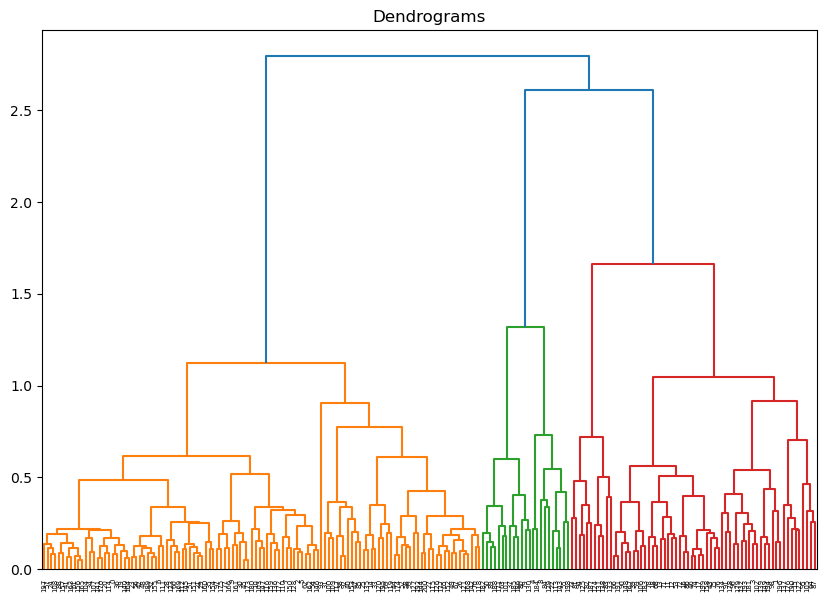

In [21]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

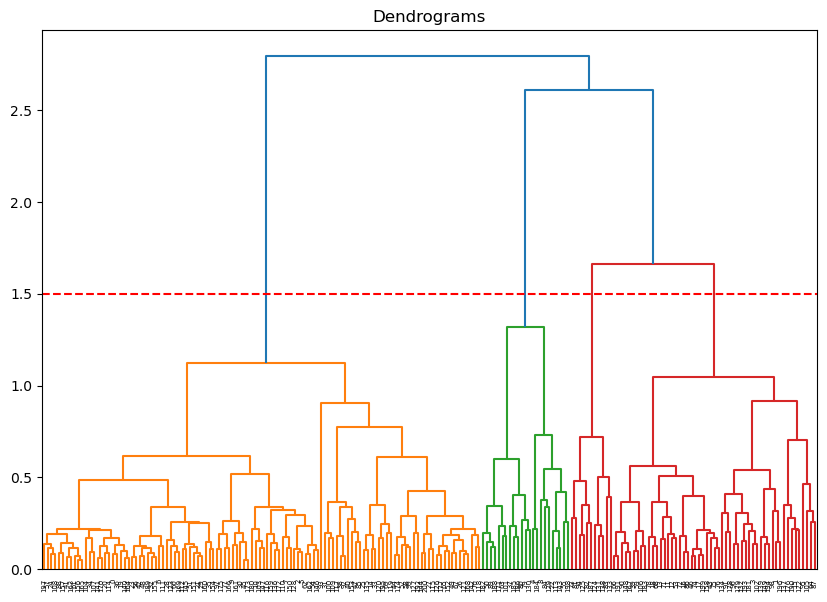

In [22]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.5, color='r', linestyle='--')

# Q5. Discuss what happens when you decide to cut the dendogram at a different level.

Cutting a dendrogram at a different level means selecting a different threshold value for the height at which to "cut" the dendrogram to obtain a set number of clusters. When cutting the dendrogram at a lower level in this instance at 1.0 will result in 7 clusters as compared to the current 4 clusters. If it is cut at an higher level say 2.0, the cluster is reduced to 3.

If the dendrogram is cut at a high level, the resulting clusters will be more general and inclusive, meaning that similar data points will be grouped together regardless of their finer differences. This may be appropriate for exploratory data analysis or for identifying broad patterns in the data.

On the other hand, cutting the dendrogram at a low level may result in more specific and granular clusters, which can reveal more subtle patterns in the data. However, if the dendrogram is cut too low, it may result in overfitting or generating clusters that are too specific to the particular data at hand, leading to poor generalization and limited usefulness for future analyses.

Therefore, the decision of where to cut the dendrogram should be made carefully and should consider the specific goals of the analysis and the nature of the data being clustered. It is often helpful to explore the results of clustering at different levels to gain a better understanding of the structure of the data and to choose a suitable level for the final set of clusters.

In [23]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster_ids = cluster.fit_predict(data_scaled)

In [24]:
clustering_data['cluster'] = cluster_ids
clustering_data.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences,cluster
0,6.0,0,24.0,36.0,0,18,12.0,6,48.0,6.0,0.0,0,36.0,276.0,1
1,0.0,0,36.0,6.0,0,0,18.0,0,12.0,0.0,0.0,0,18.0,84.0,2
2,108.0,6,78.0,84.0,24,30,60.0,18,72.0,24.0,6.0,6,138.0,612.0,1
3,6.0,6,48.0,6.0,0,12,12.0,0,6.0,6.0,6.0,6,36.0,126.0,2
4,24.0,0,18.0,18.0,0,6,24.0,12,6.0,0.0,126.0,6,54.0,60.0,0


In [25]:
hierarchical_cluster = pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
hierarchical_cluster

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
cluster,,,,,,,,,,,,,,
0,104.3,3.1,65.5,115.3,24.8,16.2,86.1,30.8,144.0,44.6,272.1,19.3,147.4,530.1
1,70.2,2.1,60.1,118.2,18.7,27.3,60.6,21.3,116.6,18.7,26.3,6.2,94.3,591.5
2,26.7,0.9,49.7,40.9,6.0,9.7,41.4,5.1,45.7,7.8,9.1,1.2,90.8,225.2
3,10.4,0.0,57.3,24.5,4.9,3.8,14.2,3.8,26.2,4.9,2.7,0.5,111.8,110.2


# Q6. Discuss the clustering results based on your dataset.
Based on observation, the clustering results can be observed to show that:
- Cluster ID 0 is the LSOA codes with the highest number of crimes (the highest risk regions).
- Cluster ID 3 is the LSOA codes with the lowest number of crimes (the lowest risk regions).
- Cluster ID 1 is the LSOA codes with moderate number of crimes.
- Cluster ID 2 is the LSOA codes where crime numbers are mild.

In [26]:
clustering_data_original['cluster'] = cluster_ids
clusters = clustering_data_original[['LSOA code', 'cluster']]

In [27]:
clusters.head()

,LSOA code,cluster
0,E01009719,1
1,E01009720,2
2,E01009721,1
3,E01009722,2
4,E01009723,0


In [28]:
clusters.shape

(201, 2)

In [29]:
clustered_full = pd.merge(filtered_data, clusters, on='LSOA code')
clustered_full.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town,cluster
0,4343dfc303951b62cddb34d316f7396ce2fa078906cfa2...,2021-12,West Midlands Police,West Midlands Police,-2.083943,52.549631,On or near Bell Street,E01009763,Dudley 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,file0,Dudley,1
1,84b43f3b32d33a4003a8484ca98b141744da5bca25f9d3...,2021-12,West Midlands Police,West Midlands Police,-2.077263,52.550139,On or near Skidmore Road,E01009763,Dudley 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,file0,Dudley,1
2,5034aa50a37e7431c7047ae66ff7eba95c30b5a0fad919...,2021-12,West Midlands Police,West Midlands Police,-2.087360,52.547390,On or near Havacre Lane,E01009763,Dudley 001A,Other theft,Investigation complete; no suspect identified,NaN,file0,Dudley,1
3,cc984934af7be5524dbd1c78f67fdd2fdba189cceb1bf7...,2021-12,West Midlands Police,West Midlands Police,-2.075000,52.545942,On or near Sunbury Close,E01009763,Dudley 001A,Other theft,Investigation complete; no suspect identified,NaN,file0,Dudley,1
4,c084477f818e8e32dffc951f7160649a122dc9de788e04...,2021-12,West Midlands Police,West Midlands Police,-2.083943,52.549631,On or near Bell Street,E01009763,Dudley 001A,Other theft,Investigation complete; no suspect identified,NaN,file0,Dudley,1


In [30]:
def get_color(cluster_id):
    if cluster_id == 0:
        return 'darkred'
    if cluster_id == 2:
        return 'green'
    if cluster_id == 3:
        return 'amber'
    if cluster_id == 1:
        return 'blue'

In [31]:
#create a map
this_map = folium.Map(location =[clustered_full["Latitude"].mean(), 
                                 clustered_full["Longitude"].mean()], zoom_start=5)
 
def plot_dot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude],
                        radius=2, 
                        color=point.color,
                        weight=1).add_to(this_map)
    
    
clustered_full["color"] = clustered_full["cluster"].apply(lambda x: get_color(x))
 
#use df.apply(,axis=1) to iterate through every row in your dataframe
clustered_full.apply(plot_dot, axis = 1)
 
 
#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())
 
#Save the map to an HTML file
this_map.save(os.path.join('Crime_map2.html'))
#IFrame(src='Crime_map.html', width=1000, height=600)

### Q8. Change the parameters of the algorithm as appropriate and perform the clustering algorithm and draw the graph again. Discuss your results briefly.

In [32]:
filtered_data['Month'].value_counts()

2022-05    17964
2022-01    17412
2022-03    17280
2022-04    17214
2022-07    16662
2022-06    16356
2022-02    16086
2022-08    16080
2022-09    16014
2022-10    15834
2021-12    15654
2022-11    14658
2022-12    13944
Name: Month, dtype: int64

In [33]:
filtered_important_data1= filtered_data[['LSOA code','Month']]
filtered_important_data1= pd.get_dummies(filtered_important_data1,columns=['Month'])
clustering_data1= filtered_important_data1.groupby(['LSOA code']).agg(
    {'Month_2022-05':'sum',
     'Month_2022-01':'sum',
     'Month_2022-03':'sum',
     'Month_2022-04':'sum',
     'Month_2022-07':'sum', 
     'Month_2022-06':'sum', 
     'Month_2022-02':'sum', 
     'Month_2022-08':'sum', 
     'Month_2022-09':'sum', 
     'Month_2022-10':'sum', 
     'Month_2021-12':'sum',
     'Month_2022-11':'sum',
     'Month_2022-12':'sum', 
    }
    ).reset_index()

In [34]:
clustering_data1[:5]

,LSOA code,Month_2022-05,Month_2022-01,Month_2022-03,Month_2022-04,Month_2022-07,Month_2022-06,Month_2022-02,Month_2022-08,Month_2022-09,Month_2022-10,Month_2021-12,Month_2022-11,Month_2022-12
0,E01009719,48.0,24.0,36.0,30.0,18.0,66.0,48.0,6.0,60.0,30.0,42.0,24.0,36.0
1,E01009720,18.0,12.0,18.0,0.0,48.0,6.0,0.0,6.0,24.0,0.0,6.0,12.0,24.0
2,E01009721,90.0,60.0,66.0,144.0,120.0,108.0,120.0,114.0,108.0,84.0,96.0,54.0,102.0
3,E01009722,18.0,18.0,12.0,30.0,18.0,42.0,30.0,12.0,42.0,12.0,6.0,18.0,18.0
4,E01009723,30.0,6.0,24.0,24.0,42.0,24.0,48.0,54.0,24.0,30.0,6.0,30.0,12.0


In [35]:
clustering_data_original1 = clustering_data1.copy()
clustering_data_original1.head()

,LSOA code,Month_2022-05,Month_2022-01,Month_2022-03,Month_2022-04,Month_2022-07,Month_2022-06,Month_2022-02,Month_2022-08,Month_2022-09,Month_2022-10,Month_2021-12,Month_2022-11,Month_2022-12
0,E01009719,48.0,24.0,36.0,30.0,18.0,66.0,48.0,6.0,60.0,30.0,42.0,24.0,36.0
1,E01009720,18.0,12.0,18.0,0.0,48.0,6.0,0.0,6.0,24.0,0.0,6.0,12.0,24.0
2,E01009721,90.0,60.0,66.0,144.0,120.0,108.0,120.0,114.0,108.0,84.0,96.0,54.0,102.0
3,E01009722,18.0,18.0,12.0,30.0,18.0,42.0,30.0,12.0,42.0,12.0,6.0,18.0,18.0
4,E01009723,30.0,6.0,24.0,24.0,42.0,24.0,48.0,54.0,24.0,30.0,6.0,30.0,12.0


In [36]:
clustering_data1.drop(['LSOA code'], axis = 1, inplace = True, errors = 'ignore')
clustering_data1.head()

,Month_2022-05,Month_2022-01,Month_2022-03,Month_2022-04,Month_2022-07,Month_2022-06,Month_2022-02,Month_2022-08,Month_2022-09,Month_2022-10,Month_2021-12,Month_2022-11,Month_2022-12
0,48.0,24.0,36.0,30.0,18.0,66.0,48.0,6.0,60.0,30.0,42.0,24.0,36.0
1,18.0,12.0,18.0,0.0,48.0,6.0,0.0,6.0,24.0,0.0,6.0,12.0,24.0
2,90.0,60.0,66.0,144.0,120.0,108.0,120.0,114.0,108.0,84.0,96.0,54.0,102.0
3,18.0,18.0,12.0,30.0,18.0,42.0,30.0,12.0,42.0,12.0,6.0,18.0,18.0
4,30.0,6.0,24.0,24.0,42.0,24.0,48.0,54.0,24.0,30.0,6.0,30.0,12.0


In [37]:
data_scaled1 = normalize(clustering_data1)
data_scaled1 = pd.DataFrame(data_scaled1, columns=clustering_data1.columns)
data_scaled1.head()

,Month_2022-05,Month_2022-01,Month_2022-03,Month_2022-04,Month_2022-07,Month_2022-06,Month_2022-02,Month_2022-08,Month_2022-09,Month_2022-10,Month_2021-12,Month_2022-11,Month_2022-12
0,0.337460,0.168730,0.253095,0.210912,0.126547,0.464007,0.337460,0.042182,0.421825,0.210912,0.295277,0.168730,0.253095
1,0.268328,0.178885,0.268328,0.000000,0.715542,0.089443,0.000000,0.089443,0.357771,0.000000,0.089443,0.178885,0.357771
2,0.248180,0.165453,0.181999,0.397088,0.330906,0.297816,0.330906,0.314361,0.297816,0.231634,0.264725,0.148908,0.281270
3,0.209020,0.209020,0.139347,0.348367,0.209020,0.487713,0.348367,0.139347,0.487713,0.139347,0.069673,0.209020,0.209020
4,0.271563,0.054313,0.217250,0.217250,0.380188,0.217250,0.434500,0.488813,0.217250,0.271563,0.054313,0.271563,0.108625


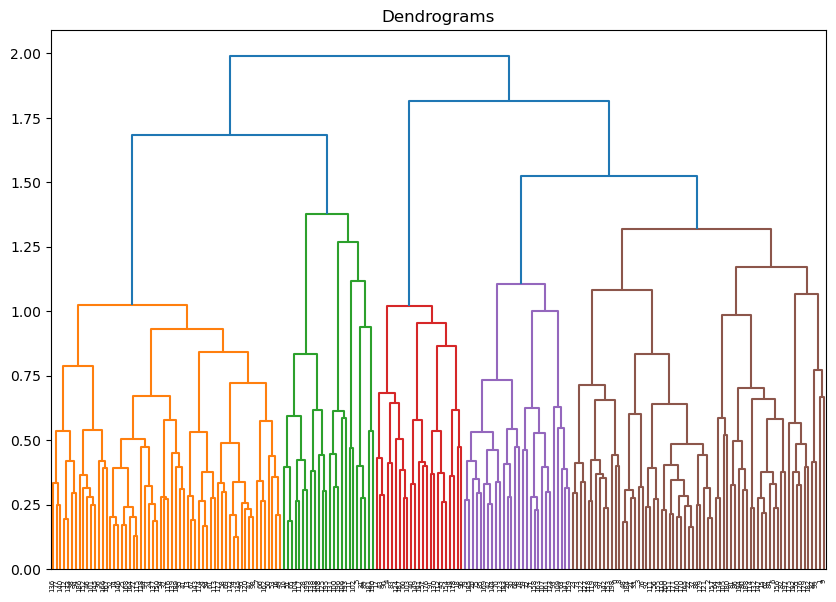

In [38]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled1, method='ward'))

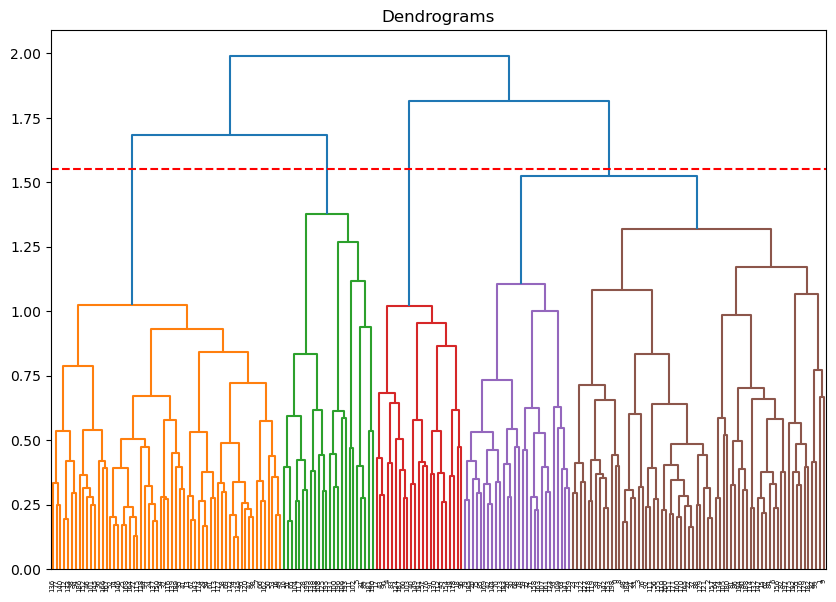

In [39]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled1, method='ward'))
plt.axhline(y=1.55, color='r', linestyle='--')

In [40]:
cluster1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster_ids1 = cluster1.fit_predict(data_scaled1)

In [41]:
clustering_data1['cluster'] = cluster_ids1
clustering_data1.head()

,Month_2022-05,Month_2022-01,Month_2022-03,Month_2022-04,Month_2022-07,Month_2022-06,Month_2022-02,Month_2022-08,Month_2022-09,Month_2022-10,Month_2021-12,Month_2022-11,Month_2022-12,cluster
0,48.0,24.0,36.0,30.0,18.0,66.0,48.0,6.0,60.0,30.0,42.0,24.0,36.0,0
1,18.0,12.0,18.0,0.0,48.0,6.0,0.0,6.0,24.0,0.0,6.0,12.0,24.0,0
2,90.0,60.0,66.0,144.0,120.0,108.0,120.0,114.0,108.0,84.0,96.0,54.0,102.0,0
3,18.0,18.0,12.0,30.0,18.0,42.0,30.0,12.0,42.0,12.0,6.0,18.0,18.0,0
4,30.0,6.0,24.0,24.0,42.0,24.0,48.0,54.0,24.0,30.0,6.0,30.0,12.0,2


In [42]:
hierarchical_cluster1 = pd.DataFrame(round(clustering_data1.groupby('cluster').mean(),1))
hierarchical_cluster1

,Month_2022-05,Month_2022-01,Month_2022-03,Month_2022-04,Month_2022-07,Month_2022-06,Month_2022-02,Month_2022-08,Month_2022-09,Month_2022-10,Month_2021-12,Month_2022-11,Month_2022-12
cluster,,,,,,,,,,,,,
0,87.6,75.4,87.5,92.2,94.6,93.6,84.6,84.6,91.8,90.6,71.7,84.9,79.1
1,41.5,38.5,64.2,29.0,27.2,40.5,49.2,36.2,44.2,25.5,55.0,30.0,32.5
2,61.0,40.7,39.7,39.1,48.0,39.7,32.3,82.7,47.0,51.7,39.4,38.6,36.5
3,122.2,141.0,110.0,115.8,100.2,94.6,103.4,89.2,87.4,92.0,111.4,84.5,81.5


Based on observation, the clustering results can be observed to show that:

- Cluster ID 3 is the LSOA codes with the highest number of crimes (the highest risk regions).
- Cluster ID 0 is the LSOA codes with the lowest number of crimes (the lowest risk regions).
- Cluster ID 2 is the LSOA codes with moderate number of crimes.
- Cluster ID 1 is the LSOA codes where crime numbers are mild.